<a href="https://colab.research.google.com/github/EslamKampoza/machine-intelligence-paper-/blob/main/oppo1_SMOTE_DMLPCAFinal2-1-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
#from tensorflow.keras import regularizers
#from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
#from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from imblearn.metrics import classification_report_imbalanced

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
class models():
    def __init__(self, path):
        self.path = path
       
    
    def read_h5(self):
        f = h5py.File(path, 'r')
        X = f.get('inputs')
        y = f.get('labels') 
        #print(type(X))
        #print(type(y))
        self.X = np.array(X)
        self.y = np.array(y)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.4, random_state = 1)
    
        print("X = ", self.X.shape)
        print("y =",self.y.shape)
        print(set(self.y))
        #return X,y
    
    def cnn_model(self):
       # K = len(set(y_train))
        #print(K)
        K = len(set(self.y))
        #X = np.expand_dims(X, -1)
        self.x_train = np.expand_dims(self.x_train, -1)
        self.x_test = np.expand_dims(self.x_test,-1)
        #print(X)
        #print(X[0].shape)
        #i = Input(shape=X[0].shape)
        i = Input(shape=self.x_train[0].shape)
        x = Conv2D(32, (3,3), strides = 2, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(i)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2))(x)
        x = Dropout(0.2)(x)
        x = Conv2D(64, (3,3), strides = 2, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
        x = Conv2D(128, (3,3), strides = 2, activation = 'relu',padding='same',kernel_regularizer=regularizers.l2(0.0005))(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2))(x)
        x = Dropout(0.2)(x)
        x = Flatten()(x)    
        x = Dropout(0.2)(x)
        x = Dense(1024,activation = 'relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(K, activation = 'softmax')(x)       
        self.model = Model(i,x)
        self.model.compile(optimizer = Adam(lr=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

        #self.r = model.fit(X, y, validation_split = 0.4, epochs = 50, batch_size = 32 )
        self.r = self.model.fit(self.x_train, self.y_train, validation_data = (self.x_test, self.y_test), epochs = 50, batch_size = 32 )
        print(self.model.summary())
        # It is better than using keras do the splitting!!
        return self.r
    
    def dnn_model(self):
       # K = len(set(y_train))
        #print(K)
        K = len(set(self.y))
        print(self.x_train[0].shape)
        i = Input(shape=self.x_train[0].shape)
        x = Flatten()(i)
        x = Dense(128,activation = 'relu')(x)
        x = Dense(128,activation = 'relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(256,activation = 'relu')(x)
        x = Dense(256,activation = 'relu')(x)
        x = Dense(256,activation = 'relu')(x)
        #x = Dropout(0.2)(x)
        x = Dense(1024,activation = 'relu')(x)
        x = Dense(K,activation = 'softmax')(x)
        self.model = Model(i,x)      
        self.model.compile(optimizer = Adam(lr=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
        
        '''
        K = len(set(self.y))
        model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=self.x_train[0].shape),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(K,activation = 'softmax')
        ])
        model.compile(optimizer = Adam(lr=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
        '''
        self.r = self.model.fit(self.x_train, self.y_train, validation_data = (self.x_test, self.y_test), epochs = 50 )
        print(self.model.summary())
        return self.r
    

    def rnn_model(self):
        K = len(set(self.y))
        i = Input(shape = self.x_train[0].shape)
        x = LSTM(256, return_sequences=True)(i)
        x = Dense(128,activation = 'relu')(x)
        x = GlobalMaxPooling1D()(x)
        x = Dense(K,activation = 'softmax')(x)
        self.model = Model(i,x)      
        self.model.compile(optimizer = Adam(lr=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
        self.r = self.model.fit(self.x_train, self.y_train, validation_data = (self.x_test, self.y_test), epochs = 50, batch_size = 32 )
        #self.r = model.fit(X, y, validation_split = 0.2, epochs = 10, batch_size = 32 )
        print(self.model.summary())
        return self.r
   
    def draw(self):
        f1 = plt.figure(1)
        plt.title('Loss')
        plt.plot(self.r.history['loss'], label = 'loss')
        plt.plot(self.r.history['val_loss'], label = 'val_loss')
        plt.legend()
        f1.show()
        
        f2 = plt.figure(2)
        plt.plot(self.r.history['acc'], label = 'accuracy')
        plt.plot(self.r.history['val_acc'], label = 'val_accuracy')
        plt.legend()
        f2.show()
        
    # summary, confusion matrix and heatmap
    def con_matrix(self):
        K = len(set(self.y_train))
        self.y_pred = self.model.predict(self.x_test).argmax(axis=1)
        cm = confusion_matrix(self.y_test,self.y_pred)
        self.plot_confusion_matrix(cm,list(range(K)))
            
    
    def plot_confusion_matrix(self, cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
            print("Normalized confusion matrix")
        else:
            print("Confusion matrix, without normalization")
        print(cm)
        f3 = plt.figure(3)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max()/2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('predicted label')
            f3.show()



In [4]:
model_name = "rnn" # can be cnn/dnn/rnn
loco = True # True is to use locomotion as labels. False is to use high level activities as labels
#path = "loco_2.h5"
path = ""
if loco:
    path = "./drive/MyDrive/datasets/loco_2.h5"
else:
    path = "./drive/MyDrive/datasets/hl_2.h5"
        
oppo = models(path)
    
print("read h5 file....")
oppo.read_h5()   
#if model_name == "cnn":
#    oppo.cnn_model()
#elif model_name == "dnn":
#     oppo.dnn_model()
#elif model_name == "rnn":
#     oppo.rnn_model()
#oppo.draw()
#oppo.con_matrix()

read h5 file....
X =  (31042, 25, 220)
y = (31042,)
{0, 1, 2, 3}


In [5]:
unique,counts = np.unique(oppo.y,return_counts = True)
dict(zip(unique,counts))

{0: 1665, 1: 13968, 2: 7427, 3: 7982}

In [6]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [7]:
##Ploting Confusion Matrix
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()

In [8]:
xshape = oppo.x_train.shape
newx_train = oppo.x_train.reshape(xshape[0],(xshape[1]*xshape[2]))

In [9]:
xshape = oppo.x_test.shape
newx_test = oppo.x_test.reshape(xshape[0],(xshape[1]*xshape[2]))

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(newx_train)
newx_train = scaler.transform(newx_train)
newx_test = scaler.transform(newx_test)

In [11]:
from sklearn.decomposition import PCA
pca= PCA(0.9) # capture the %85 of the variance
pca.fit(newx_train)
newx_train=pca.transform(newx_train)
newx_test=pca.transform(newx_test)

In [12]:
!pip install metric-learn
import metric_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.8 MB/s 


In [13]:
mmc = metric_learn.ITML_Supervised()
X_mmc = mmc.fit(newx_train, oppo.y_train)

/usr/local/lib/python3.8/dist-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


In [14]:
newx_train.shape
MM = mmc.get_mahalanobis_matrix()
MM.shape

(67, 67)

In [15]:
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import math
from random import randint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




class Smote(object):
	"""docstring for Smote"""

	def __init__(self,distance,MM):
		super(Smote, self).__init__()
		self.synthetic_arr=  []
		self.newindex = 0
		self.distance_measure = distance
		self.mmc = MM       



	def Populate(self,N,i,indices,min_samples,k):
		"""
    		Populates the synthitic array


    		Returns:Synthetic Array to generate_syntheic_points 
    	"""

		while N!=0:
			arr = []
			nn = randint(0,k-2)
			features = len(min_samples[0])
			
			for attr in range(features):
				diff = min_samples[indices[nn]][attr] - min_samples[i][attr]
				gap = random.uniform(0,1)
				arr.append(min_samples[i][attr] + gap*diff)
			
			self.synthetic_arr.append(arr)
			self.newindex = self.newindex + 1
			N = N-1



	def k_neighbors(self,euclid_distance,k):
		nearest_idx_npy = np.empty([euclid_distance.shape[0],euclid_distance.shape[0]],dtype=np.int64)
		
		for i in range(len(euclid_distance)):
			idx = np.argsort(euclid_distance[i])
			nearest_idx_npy[i] = idx
			idx = 0

		return nearest_idx_npy[:,1:k]




	def find_k(self,X,k):

		"""
   			Finds k nearest neighbors using euclidian distance

   			Returns: The k nearest neighbor   
    	"""




		euclid_distance = np.empty([X.shape[0],X.shape[0]],dtype = np.float32)
		
		for i in range(len(X)):
			dist_arr = []
			for j in range(len(X)):
				dist_arr.append(math.sqrt(sum((X[j]-X[i])**2)))
			dist_arr = np.asarray(dist_arr,dtype = np.float32)
			euclid_distance[i] = dist_arr

		return self.k_neighbors(euclid_distance,k)






	def generate_synthetic_points(self,min_samples,N,k):

		"""
    		Returns (N/100) * n_minority_samples synthetic minority samples.
    		Parameters
    		----------
    		min_samples : Numpy_array-like, shape = [n_minority_samples, n_features]
    		    Holds the minority samples
    		N : percetange of new synthetic samples: 
    		    n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
    		k : int. Number of nearest neighbours. 
    		Returns
    		-------
    		S : Synthetic samples. array, 
    		    shape = [(N/100) * n_minority_samples, n_features]. 
    	"""
		

		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		N = int(N/100)
		T = min_samples.shape[0]
		
		

		if self.distance_measure == 'euclidian':
				indices = self.find_k(min_samples,k)
			
		elif self.distance_measure=='ball_tree':
			nb = NearestNeighbors(n_neighbors = k,algorithm= 'ball_tree').fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	
		elif self.distance_measure=='Mahal':
			nb = NearestNeighbors(n_neighbors = k,metric = mmc.get_metric()).fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	


		for i in range(indices.shape[0]):
			self.Populate(N,i,indices[i],min_samples,k)
		
		return np.asarray(self.synthetic_arr)

		


	def plot_synthetic_points(self,min_samples,N,k):
		"""

			Plot the over sampled synthtic samples in a scatterplot



		"""


		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree','Mahal'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		synthetic_points = self.generate_synthetic_points(min_samples,N,k)
		
		pca = PCA(n_components=2)
		pca.fit(synthetic_points)
		pca_synthetic_points = pca.transform(synthetic_points)
		
		plt.scatter(pca_synthetic_points[:,0],pca_synthetic_points[:,1])
		plt.show()
		

In [16]:
trainLabel = oppo.y_train.reshape(len(oppo.y_train),1)
train = np.hstack((newx_train, trainLabel))

In [17]:
unique,counts = np.unique(trainLabel,return_counts = True)
dict(zip(unique,counts))

{0: 1041, 1: 8356, 2: 4445, 3: 4783}

In [18]:
mask = train[:,67] == 0
class0 = train[mask]
class0 = class0[:,:67]
N = (8356-1041) * 100/1041
k = 12
class0 = np.float_(class0)
smote_test1 = Smote('Mahal',mmc)
new_class0 = smote_test1.generate_synthetic_points(class0[:,:67],N,k)

myclass = np.array([0 for x in range(len(new_class0))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_class0),1)
new_class0 = np.hstack((new_class0[:,:67],myclass))

In [19]:
mask = train[:,67] == 2
class2 = train[mask]
class2 = class0[:,:67]
N = 350
#(8356-4445) * 100/4445
k = 12
class2 = np.float_(class2)
smote_test1 = Smote('Mahal',mmc)
new_class2 = smote_test1.generate_synthetic_points(class2[:,:142],N,k)

myclass = np.array([2 for x in range(len(new_class2))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_class2),1)
new_class2 = np.hstack((new_class2[:,:67],myclass))

In [20]:
mask = train[:,67] == 3
class3 = train[mask]
class3 = class0[:,:67]
N = 350
#(8356-4445) * 100/4445
k = 12
class3 = np.float_(class3)
smote_test1 = Smote('Mahal',mmc)
new_class3 = smote_test1.generate_synthetic_points(class3[:,:67],N,k)

myclass = np.array([3 for x in range(len(new_class3))])
#myclass = ["Standing" for x in range(1500)]
myclass = myclass.reshape(len(new_class3),1)
new_class3 = np.hstack((new_class3[:,:67],myclass))

In [21]:
new_train_data = []

In [22]:
new_train_data = np.concatenate((newx_train, new_class0[:,:67]), axis=0)
new_train_data = np.concatenate((new_train_data, new_class2[:,:67]), axis=0)
new_train_data = np.concatenate((new_train_data, new_class3[:,:67]), axis=0)



In [23]:
new_train_labels= []

In [24]:

new_train_labels = np.concatenate((trainLabel, new_class0[:,-1].reshape(len(new_class0[:,-1]),1)), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_class2[:,-1].reshape(len(new_class2[:,-1]),1)), axis=0)
new_train_labels = np.concatenate((new_train_labels, new_class3[:,-1].reshape(len(new_class3[:,-1]),1)), axis=0)



In [25]:

new_train_labels = new_train_labels.reshape(len(new_train_labels),1)

In [26]:
unique,counts = np.unique(new_train_labels,return_counts = True)
dict(zip(unique,counts))

{0.0: 8328, 1.0: 8356, 2.0: 7568, 3.0: 7906}

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(new_train_data)
#trainData = scaler.transform(new_train_data)
#testData = scaler.transform(newx_test)

In [28]:
Data_res = new_train_data
labels_res = new_train_labels
testLabelE = oppo.y_test

In [29]:
#encoding Labels

encoder = LabelEncoder()

#encoding test labels

encoder.fit(oppo.y_test)
testLabelE = encoder.transform(oppo.y_test)

#encoding train labels

encoder.fit(labels_res)
trainLabelE = encoder.transform(labels_res)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(Data_res,labels_res)

print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

In [30]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
clf2= KNeighborsClassifier(n_neighbors=4, metric = mmc.get_metric())
knnModel2 = clf2.fit(Data_res,labels_res)
y_te_pred2 = clf2.predict(newx_test)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors Accuracy: 0.92679
Confusion matrix, without normalization
[[ 534    0   42   48]
 [   0 5474  125   13]
 [   0  639 2334    9]
 [   7   16   10 3166]]


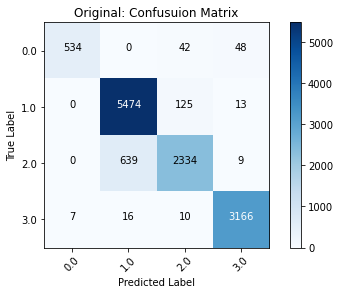

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       624
           1       0.89      0.98      0.93      5612
           2       0.93      0.78      0.85      2982
           3       0.98      0.99      0.98      3199

    accuracy                           0.93     12417
   macro avg       0.95      0.90      0.92     12417
weighted avg       0.93      0.93      0.93     12417

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      1.00      0.92      0.92      0.84       624
          1       0.89      0.98      0.90      0.93      0.94      0.89      5612
          2       0.93      0.78      0.98      0.85      0.88      0.75      2982
          3       0.98      0.99      0.99      0.98      0.99      0.98      3199

avg / total       0.93      0.93      0.95      0.93      0.94      0.88     12417



In [32]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
clf2= KNeighborsClassifier(n_neighbors=4)
knnModel2 = clf2.fit(Data_res,labels_res)
y_te_pred2 = clf2.predict(newx_test)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))
print(classification_report_imbalanced(testLabelE,y_te_pred2))

In [34]:
from sklearn import svm

model = svm.SVC(kernel='rbf') 
model.fit(Data_res,labels_res)
y_pred= model.predict(newx_test)

acc2 = accuracy_score(Data_res,labels_res)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_te_pred2))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-Nearest Neighbors Accuracy: 0.86543
Confusion matrix, without normalization
[[ 615    1    4    4]
 [   9 5336  227   40]
 [   4 1237 1730   11]
 [  10  108   16 3065]]


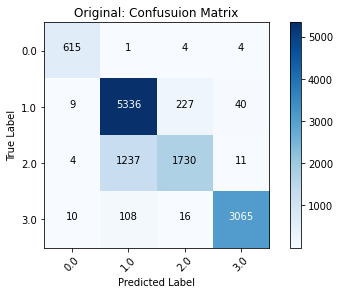

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       624
           1       0.80      0.95      0.87      5612
           2       0.88      0.58      0.70      2982
           3       0.98      0.96      0.97      3199

    accuracy                           0.87     12417
   macro avg       0.90      0.87      0.88     12417
weighted avg       0.87      0.87      0.86     12417



TypeError: ignored

In [35]:
from xgboost import XGBClassifier
model = XGBClassifier() 
model.fit(Data_res,labels_res)
y_pred= model.predict(newx_test)

acc2 = accuracy_score(testLabelE,y_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_pred)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_pred))
print(classification_report_imbalanced(testLabelE,y_te_pred2,     target_names=class_names))